# `Chi Square Distribution with plotting and Brief Explanation`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# `Purpose & Outcome:`

+ Explain Chi Distribution and how to plot using R

+ Show their relative PDF,CDF, formulas and brief explanations

**Suggested Book:** `Statistics: An Introduction using R, by Michael J. Crawley`


# `If you want to see a specific topic let me know!`

In [20]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(reshape2)
library(tidyr)
library(data.table)
set.seed(65432)


Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




# `R-Studio: Chi-Square functions`

+ `pchisq():` returns cumulative probability

+ `dchisq():` returns probability for a given chi-sq value

+ `qchisq():` returns a value

`-----------------------`

# `Chi Square Distribution(s):` 

`skewed to the right, continuous`

`Chi Squared Random Variable:`
<font size=4>$V=Z^2_1+Z^2_2+...Z^2_n$ ~ $\chi^2_n$</font>, with (n) random variables with a mutually independent standard normal distribution for each $Z$

+ Since, each value of <font size=4>$Z ~ N(0,1)$</font> and they are independent then we can choose freely (n) variables with degrees of freedom.

+ Testing hypotheses about the variance of a population

+ Testing whether a population follows a specified probability distribution

+ Special case of gamma distribution


[some useful proofs](https://www.statlect.com/probability-distributions/chi-square-distribution)

# `Use Cases of Chi-Square:`

* `Estimate Confidence Intervals` from a population (std dev.) of a normal distribution for a given sample

* `Check for independence`

* `Find differences between observed and expected`

* Can use for `goodness of fit` using Chi-Sq test

The distribution is dependent upon the number of `degrees of freedom` which will be `df = (# rows-1)(# columns-1)` or `number of samples - 1`


`------------------------`

# `PDF`

<font size=5>$f(x;k) = \frac{x^{\frac{k}{2}-1} e^{-\frac{x}{2}}}{2\frac{k}{2} \Gamma \frac{k}{2}}$</font>

**`Mean:`** degrees of freedom = k

**`Standard Deviation:`** $\sqrt{(2* DegreesOfFreedom)}$


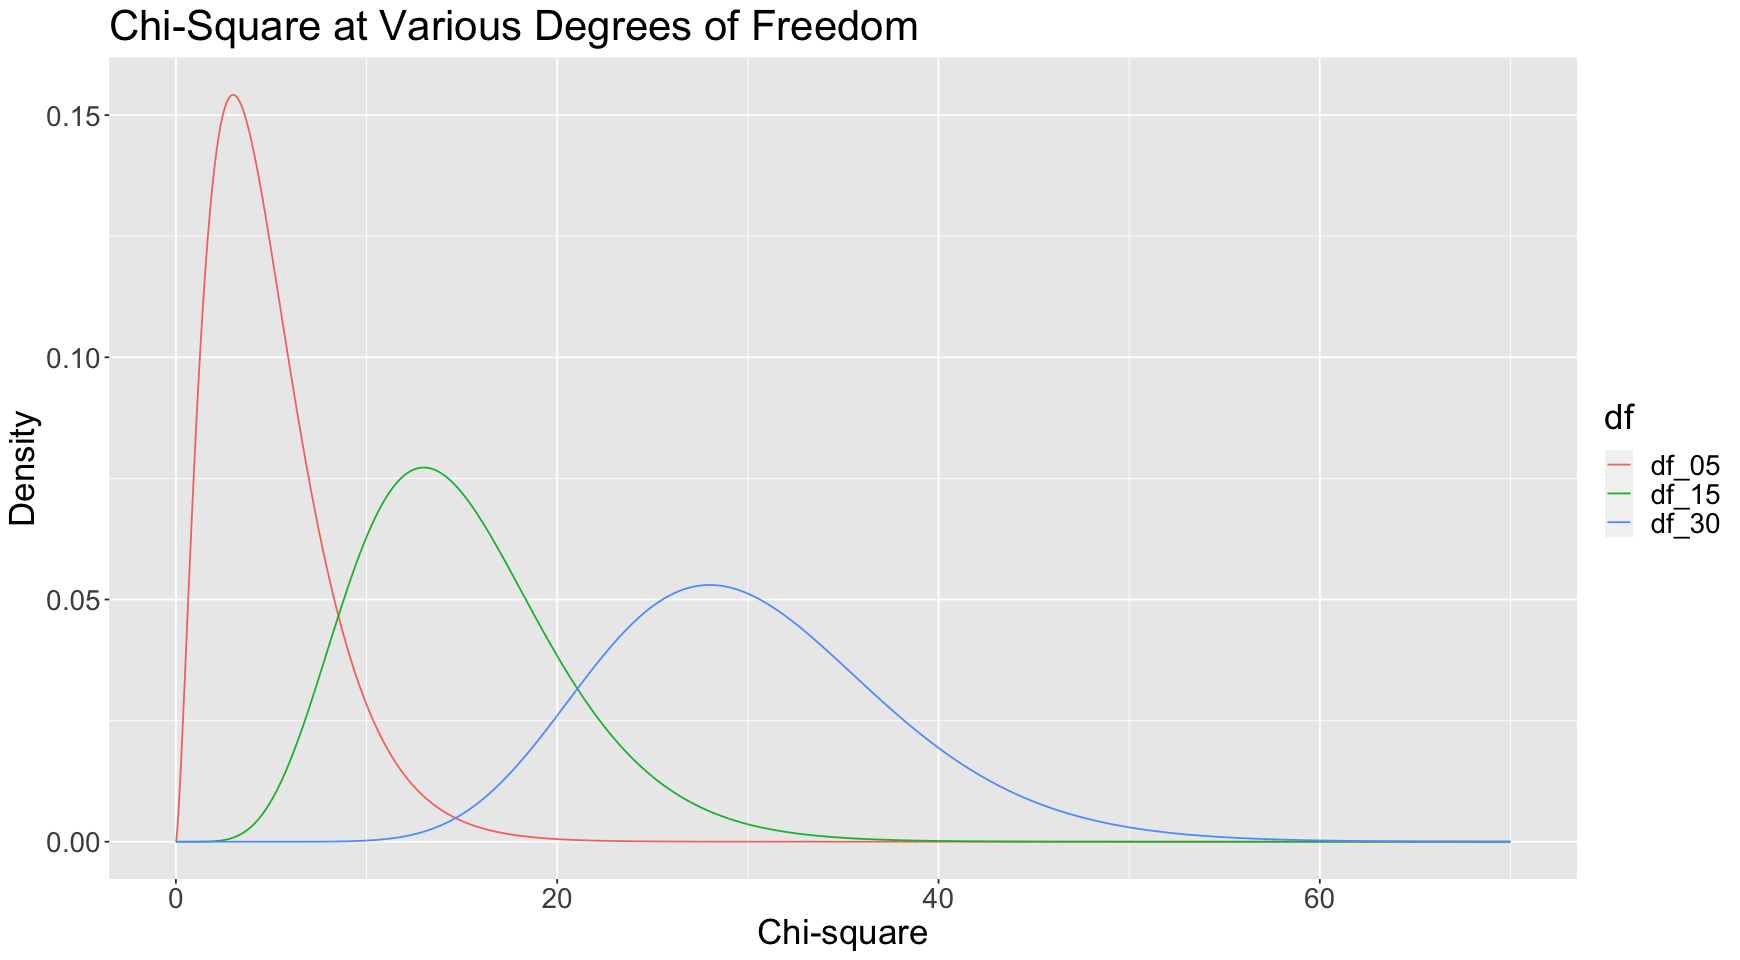

In [65]:
options(repr.plot.width=14.5, repr.plot.height=8)
data.frame(chisq = 0:7000 / 100) %>% 
           mutate(
                  df_05 = dchisq(x = chisq, df = 5),
                  df_15 = dchisq(x = chisq, df = 15),
                  df_30 = dchisq(x = chisq, df = 30)) %>%
  gather(key = "df", value = "density", -chisq) %>%
ggplot() +
  geom_line(aes(x = chisq, y = density, color = df)) +
  labs(title = "Chi-Square at Various Degrees of Freedom",
       x = "Chi-square",
       y = "Density") +
# increase font size
theme(text=element_text(size=21))

# plot from R-documentation and in citations

# `Take away from above:` 

+ as you increase the degrees of freedom, you increase the mean!

+ As you increase the degrees of freedom you approach a normal distribution


`-----------------`

# `CDF:`

+ Function whose value is the probability that a corresponding continuous random variable `has a value less than or equal` to the argument of the function [dictionary meaning] 

<font size=5>$F(x;k) = \frac{\gamma (\frac{k}{2}, \frac{x}{2}) }{\Gamma (\frac{k}{2})}$</font>, with (k) degrees of freedom

# `What is going on with this?`

When you get the Cumulative distribution you are returning a summed value of all probabilities <= value.

`ex.)` say I have chi_sq-stat value along x-axis and if you draw a vertical line it will take a summed probability of all values <= to that particular chi_sq-stat value.

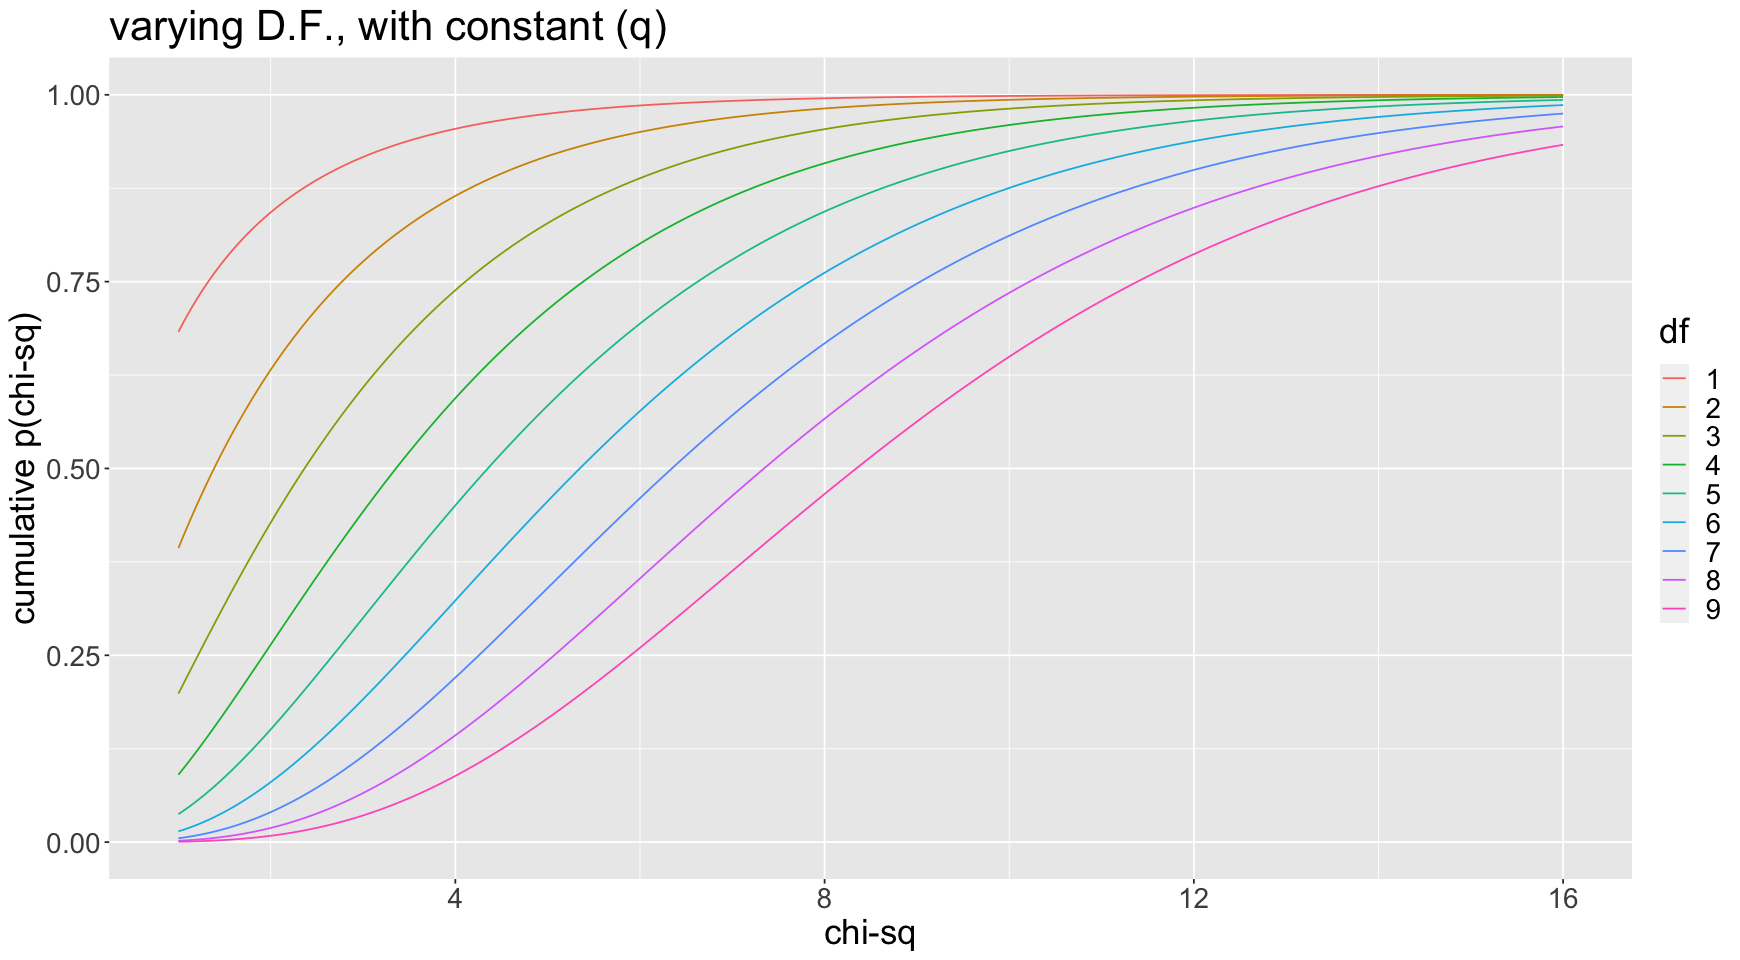

In [553]:
df = 9
x = seq(1,16,0.05)
pxd <- matrix(ncol=df, nrow=length(x))

for(i in 1:df){
  pxd[,i] <- pchisq(x, i, lower.tail = T)
}

pxd <- data.frame(pxd)
colnames(pxd) <- c(1:df)
pxd <- cbind(x, pxd)
pxd <- gather(pxd, df, px, -x)

ggplot(pxd, aes(x, px, color=df)) +
  geom_line() + xlab("chi-sq")+ylab("cumulative p(chi-sq)")+
theme(text=element_text(size=21))+
ggtitle('varying D.F., with constant (q)')

# plot from citations (plotting)

# `Interpreting Above plot:`

+ As you increase the degrees of freedom,there is a shift and your mean also increases 

+ For the same value of chi-sq using pdf the probability will be different because:
    * cdf: sums values up to that point
    * pdf: returns a specific value at that point
+ The tail will shrink as well as the D.F. increase, pay attention to the upper right when you approach 1.

* `LASTLY`, you are throwing in a value for chi-sq stat, and degrees of freedom and returning a PROB. (*cumulative*)

`---------------------`

# `Q Chi_SQ:`

+ You are returning a value for chi-sq

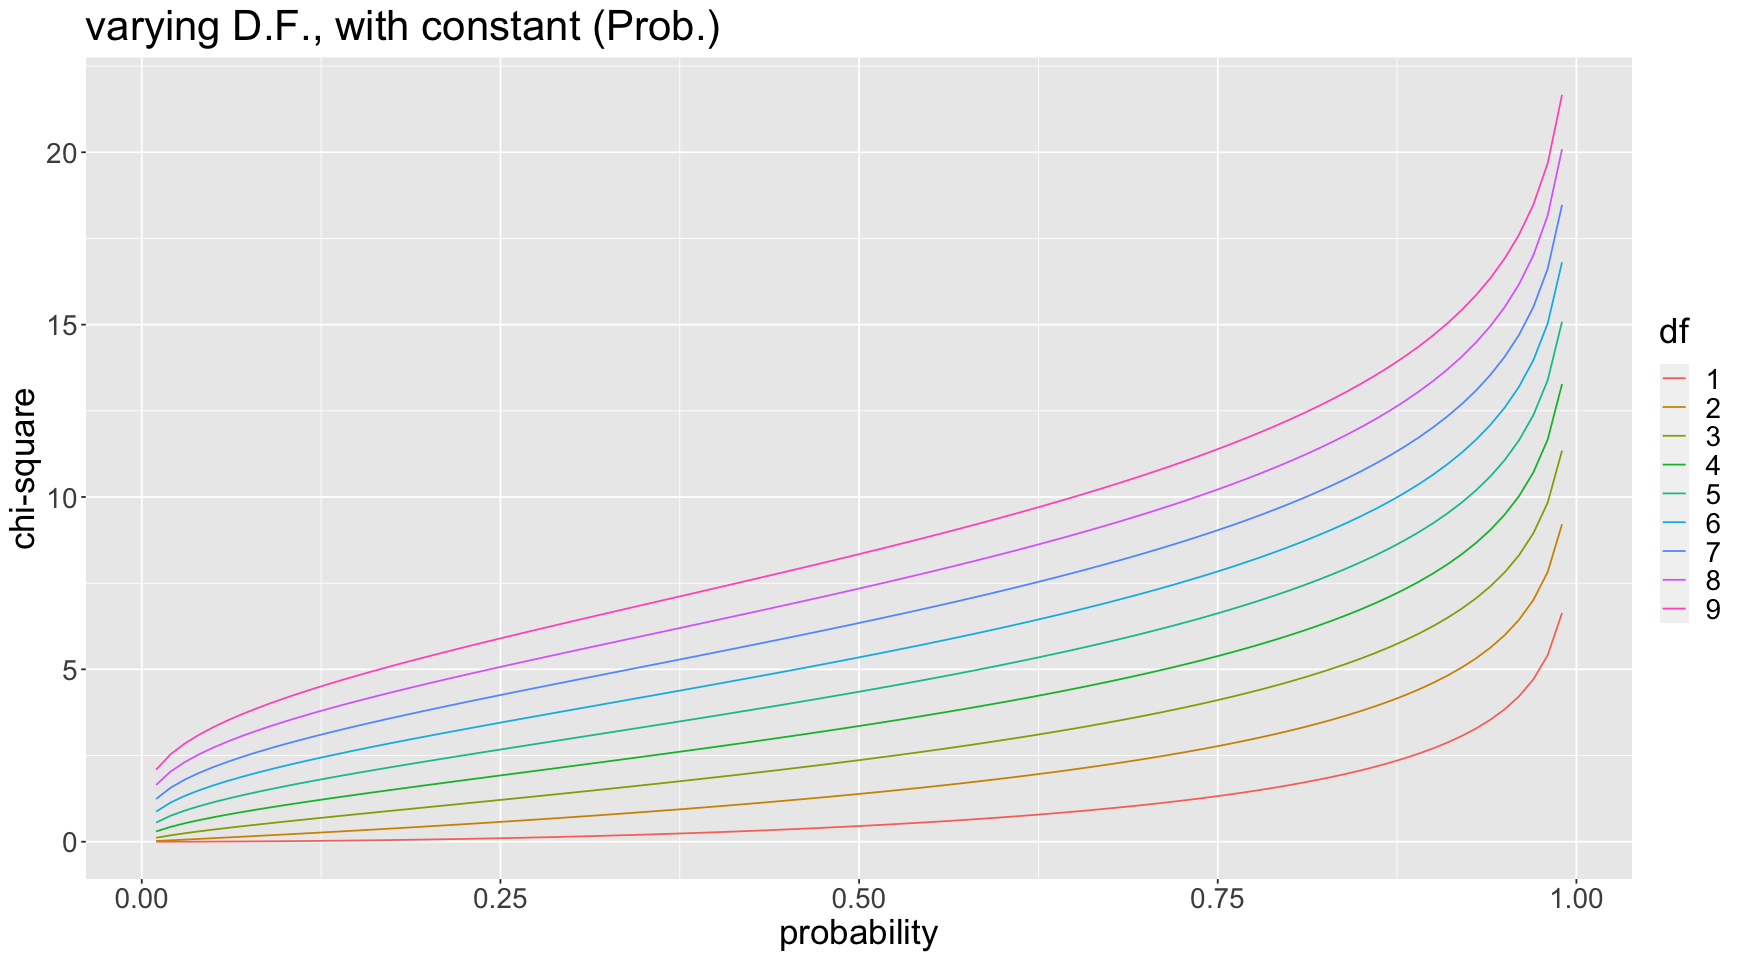

In [557]:
df = 9
p = seq(0.01, .99, 0.01)
xpd <- matrix(ncol=df, nrow=length(p))

for(i in 1:df){
  xpd[,i] <- qchisq(p, i)
}

xpd <- data.frame(xpd)
colnames(xpd) <- c(1:df)
xpd <- cbind(p, xpd)
xpd <- gather(xpd, df, qchisq, -p)

ggplot(xpd, aes(p, qchisq, color=df)) +
  geom_line() + xlab("probability")+ylab("chi-square")+

theme(text=element_text(size=21))+
ggtitle('varying D.F., with constant (Prob.)')

# `Interpret Above:`

+ For any given probability you will have varying D.F. 

+ You are returning a value (chi-sq) on the y-axis for a given probability and D.F.

`-----------------------------`

# `Goodness of Fit:`

**For categorical data**: `1 variable`

+ **Hypothesis test**: used to evaluate if a
    + 'fit' a particular distribution or not.
    + Or fit to a fitted assumed model

+ *Assumed independence* of model when evaluating against the observed data.
    + This is always, right tailed
        + The tail will grow if the difference between observed and expected are not close

<font size=5>$\chi^2 = \sum_{k} \frac{(Observed -Expected)^2}{Expected}$</font>

**`Think of it like this`**: `"How close are the observed values to those that are expected for the fitted model."`

+ `Also, if you get a large value for this test statistic, it means that the observed and expected values were not close togehter and you will have a poor fit to the data.`

`------------------------------`

ex.) suppose you have an idea about your data and suspect it follows a binomial distribution and want to check.


[practical examples](https://courses.lumenlearning.com/introstats1/chapter/test-of-independence/)

# Ex. ) `Cyclist skill level:`

**1. )** 

**`State Null Hypothesis`** ($H_o$): 
The proportion of cyclists skill levels are Newbie, Moderate, Pro with Probability: p=(.54,.24,.22)

**`Alternate Hypothesis`:** at least one of these probabilities in Null Hypothesis are false.

**2.)** Form the analysis with $\alpha$ = .05

**3. )** Start evaluating our data: by creating `expected values`

**4. )** get the degrees of fredom


`---------------------`

| `Cyclist_Level` 	| **Newbie** 	| **Moderate** 	| **Pro**   	| `Row_Totals` 	|
|---------------	|--------	|----------	|-------	|------------	|
| `Observed`      	| 300    	| 144      	| 98    	| 542        	|
| `Expected`     	| 292.68  	| 130.08    	| 119.24 	| 542        	|

`Then We have to calculate each category:`

| `Cyclist_Level` 	| **Newbie** 	| **Moderate** 	| **Pro**   	| `Row_Totals` 	|
|---------------	|--------	|----------	|-------	|------------	|
| `Observed`      	| 300    	| 144      	| 98    	| 542        	|
| `Expected`      	| 292.68  	| 130.08    	| 119.24 	| 542        	|
| $
\chi^2$=**`(O-E)^2/E`**     	| 0.183 	| 1.49    	| 3.783 	| **5.456**      	|


`Degrees of Freedom:` since there are 3 categories: (3-1)=2

In [415]:
print('Observed chi-sq stat')
round((300-292.68)^2/292.68,digits=3)+

round((144-130.08)^2/130.08,digits=3)+

round((98-119.24)^2/119.24,digits=3)

print('Prob. Observed')
round(dchisq(df=2,x=5.46),digits=4)*2

print('Expected chi-sq stat:')
round(qchisq(.95,df=2),digits=3)


chisq.test(x = c(300,144,98),p=c(.54,.24,.22),correct = FALSE)
# pchisq = q(,df = 2,lower.tail = FALSE)

round(1-pchisq(df=2,5.456),digits=5)

round(pchisq(df=2,5.456,lower.tail = FALSE),digits=5)

[1] "Observed chi-sq stat"


[1] 5.456

[1] "Prob. observed"


[1] 0.0652

[1] "Expected chi-sq stat:"


[1] 5.991


	Chi-squared test for given probabilities

data:  c(300, 144, 98)
X-squared = 5.4561, df = 2, p-value = 0.06535


[1] 0.06535

[1] 0.06535

In [421]:
print('Expected chi-sq stat:')
round(qchisq(.95,df=2),digits=3)

print('Observed chi-sq stat:')
round(5.456,digits=3)

[1] "Expected chi-sq stat:"


[1] 5.991

[1] "Observed chi-sq stat:"


[1] 5.456

In [558]:
# print('Expected Prob:')
# dchisq(df = 2,x=qchisq(.95,df=2))
print('Prob. Expected')
round(pchisq(df=2,qchisq(.95,df=2),lower.tail = FALSE),digits=5)

# print('Observed Prob:')
# round(dchisq(df = 2,x=6.123),digits=4)
print('Prob Observed')
round(pchisq(df = 2,5.456,lower.tail = FALSE),digits=5)

[1] "Prob. Expected"


[1] 0.05

[1] "Prob Observed"


[1] 0.06535

In [425]:
# `Answer:` 
obs <-c(300,144,98)

null_p<-c(.54,.24,.22)

co<-chisq.test(obs,p=null_p)

print('Chi-square test for given data:')
co
print('-----------')
print('expected values chi-sq stat:')
co$expected


[1] "Chi-square test for given data:"



	Chi-squared test for given probabilities

data:  obs
X-squared = 5.4561, df = 2, p-value = 0.06535


[1] "-----------"
[1] "expected values chi-sq stat:"


[1] 292.68 130.08 119.24

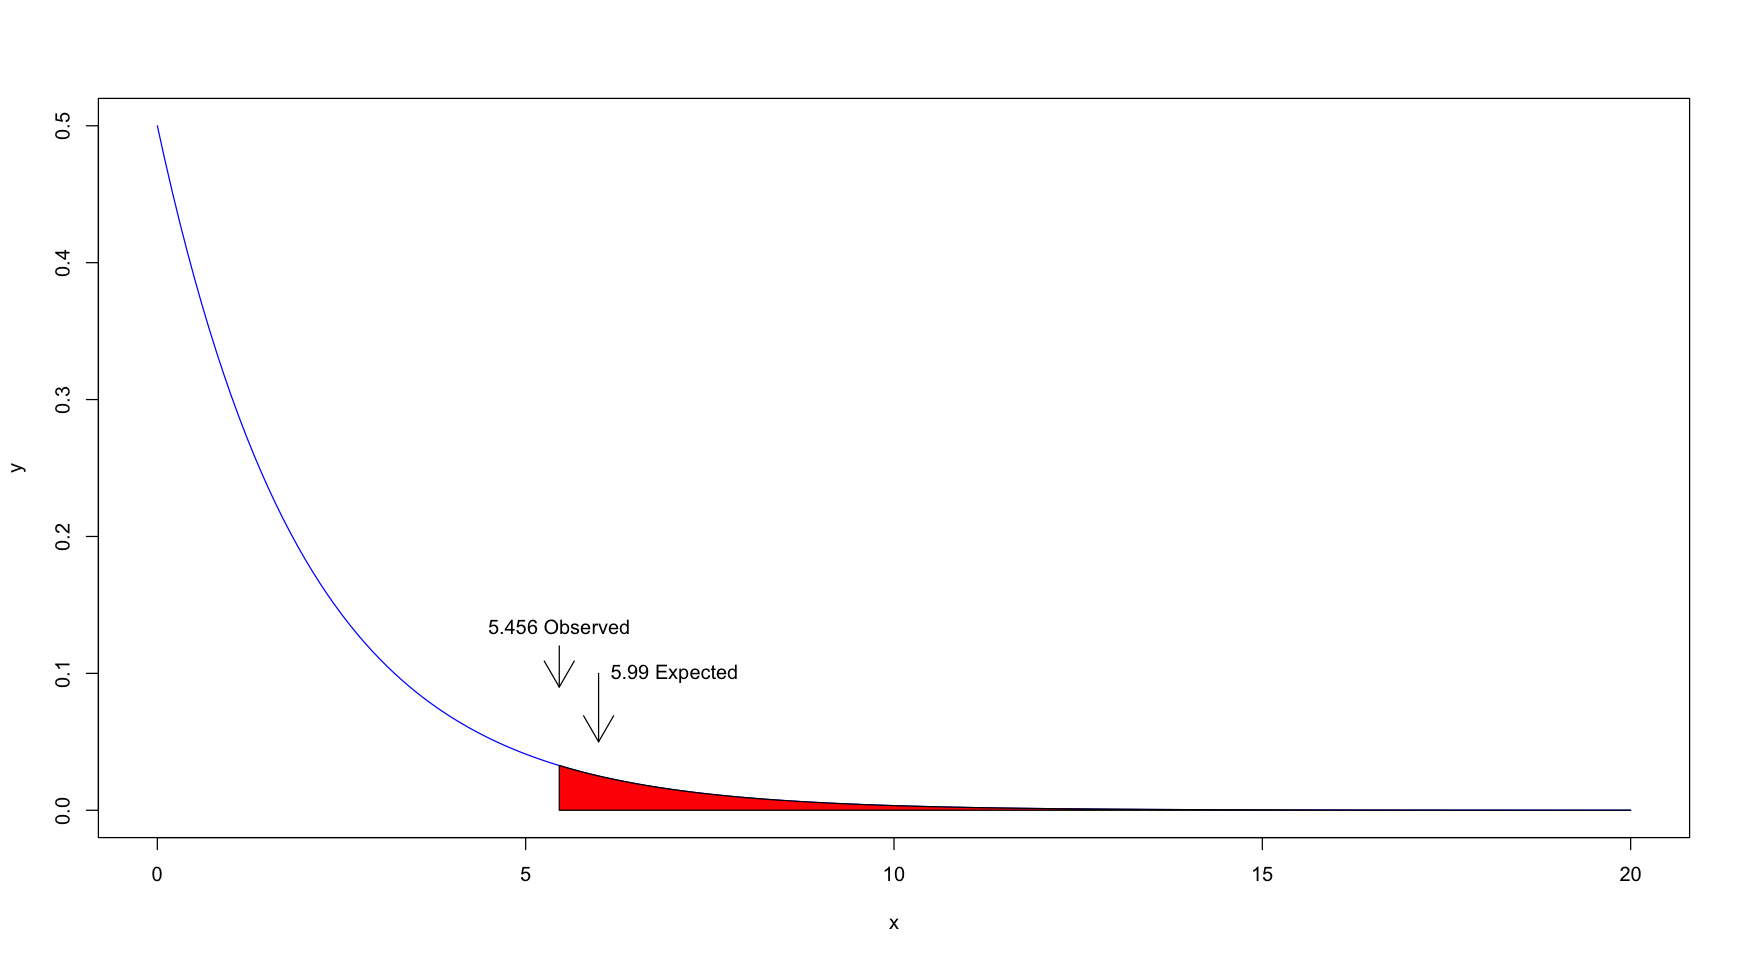

In [550]:
x=seq(0,20,length=200)
y=dchisq(x,2)
plot(x,y,type="l",col="blue")
xx=seq(5.456,20,length=100)
yy=dchisq(xx,2)
polygon(c(5.456,xx,20),c(0,yy,0),col="red")
arrows(5.456,0.12,5.456,0.09)
text(5.456,0.12,"5.456 Observed",pos=3)
arrows(5.99,.1,5.99,.05)
text(5.99,.1,"5.99 Expected",pos=4)

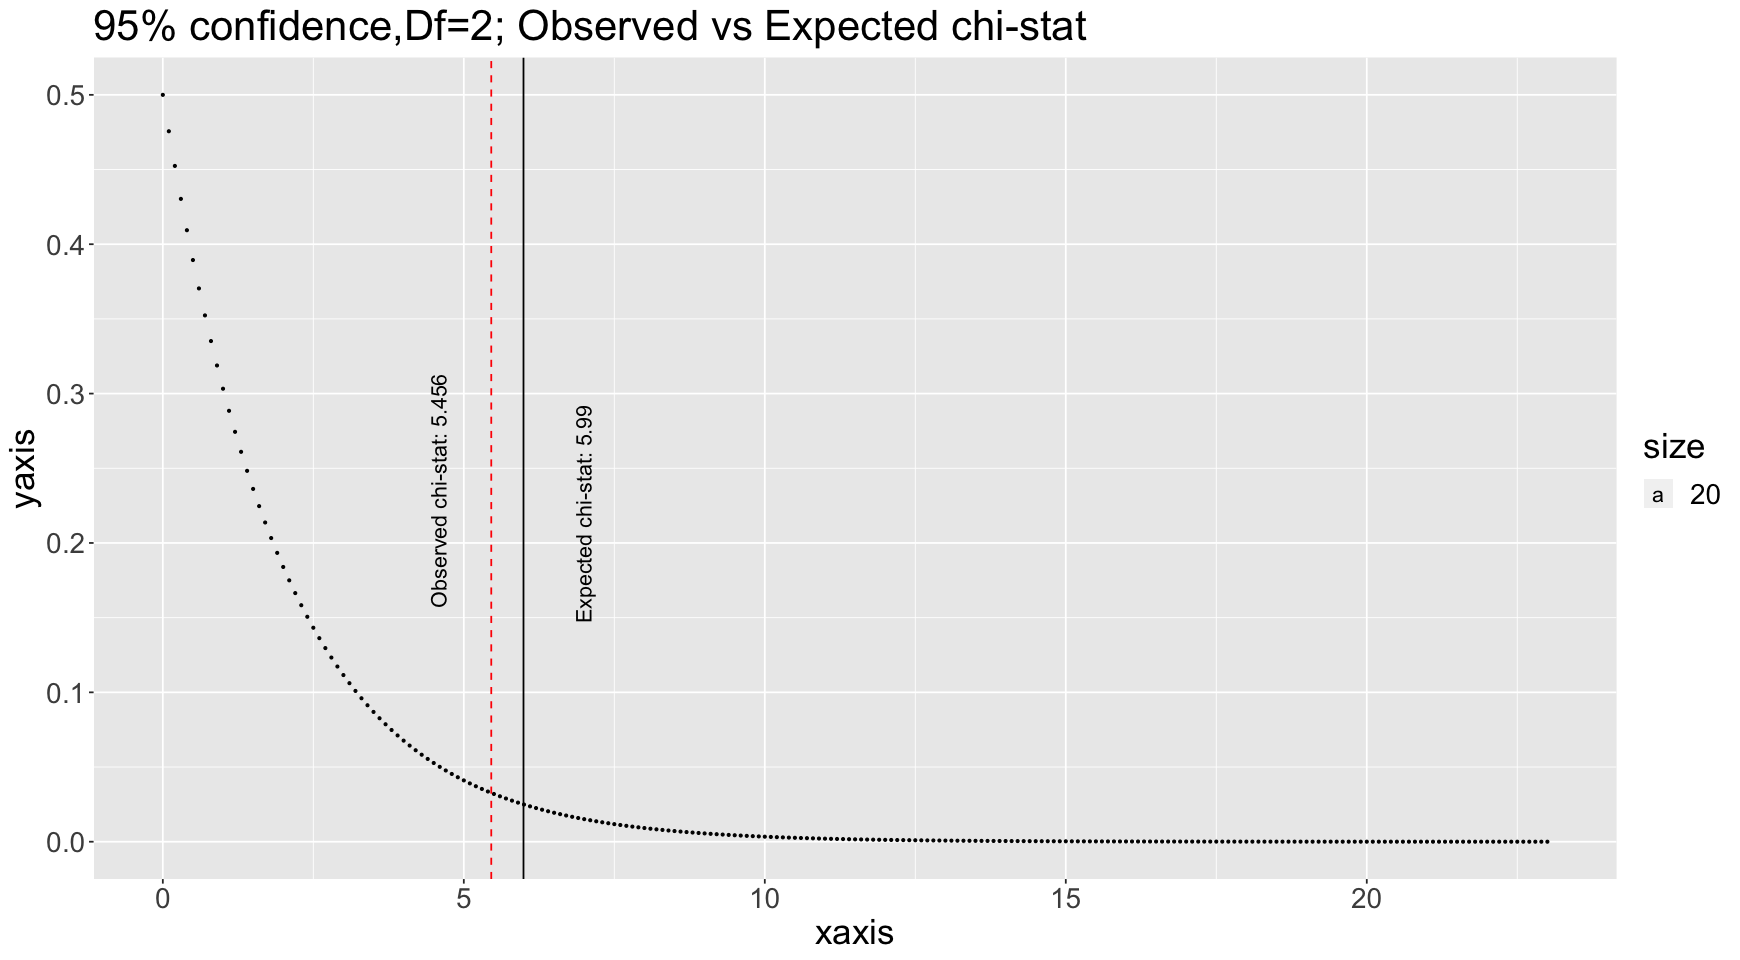

In [477]:
y_axis <- dchisq(seq(0,23,by=.1), df=2, ncp = 0, log = FALSE)
x_axis <- seq(0,23,by=.1)
Samp<- data.table(xaxis = x_axis, yaxis=y_axis)

cuts<- data.frame(Ref = c("Observed chi-stat: 5.456", "Expected chi-stat: 5.99"),
                   vals = c(qchisq(.95,df=2),chi_sq),
                   stringsAsFactors = FALSE)

ggplot(Samp, aes(xaxis,yaxis))+geom_point(size=0.5)+
theme(text=element_text(size=21))+
geom_vline(xintercept=qchisq(.95,df=2))+
# title
ggtitle("95% confidence,Df=2; Observed vs Expected chi-stat")+
geom_vline(xintercept = 5.456,linetype = "dashed", colour = "red",show.legend = FALSE)+
# adjust text for vertical lines: 
geom_text(mapping = aes(x = vals,
                          y = 0,
                          label = Ref,
                          hjust = -1,
                          vjust = -5,
                         angle=90,size=20),
                        data = cuts)


# `ANSWER:` 

+ With 95% confidence level, df=2 we have a weakly independent model with p-value: 0.06535. The observed value (5.456) lies inside of the expected 5.99 and we FAIL to reject the Null Hypothesis. 

+ this is really close, you can do other tests to conclude/make a decision! (I would) 

`-------------------------`

# `CAUTION AND PAY ATTENTION TO THIS PLEASE:`

In [564]:
print('Probability for right tail, for given chi-sq value:')
print('Prob. Expected (5.99):')
round(pchisq(df=2,qchisq(.95,df=2),lower.tail = FALSE),digits=5)

print('Prob Observed (5.456)')
round(pchisq(df = 2,5.456,lower.tail = FALSE),digits=5)

print('This is the Probability for this exact chi-sq value:')
print('Expected Prob for chi-sq (5.99):')
dchisq(df = 2,x=qchisq(.95,df=2))

print('Observed Prob for chi-sq (5.456):')
round(dchisq(df = 2,x=5.456),digits=4)

[1] "Probability for right tail, for given chi-sq value:"
[1] "Prob. Expected (5.99):"


[1] 0.05

[1] "Prob Observed (5.456)"


[1] 0.06535

[1] "This is the Probability for this exact chi-sq value:"
[1] "Expected Prob for chi-sq (5.99):"


[1] 0.025

[1] "Observed Prob for chi-sq (5.456):"


[1] 0.0327

`------------------------------------`

# `Estimate Confidence Intervals:`

Since the chi-square is not symmetric distribution we have to find the sides:

`Degrees of Freedom: (n-1)` 

`Left Critical Value` ($\chi{^2}_{Left}$): <font size=5>$\frac{1-ConfidenceLevel}{2}$</font>

`Right Critical Value`($\chi{^2}_{Right}$): <font size=5>$\frac{1+ConfidenceLevel}{2}$</font>

`Interpret our Critical values from above:`

+ If you found a value great than the one you calculated versus a table value for same d.f. and confidence interval than you would reject the Null Hypothesis. Kind of an old school approach.

`------------------`

`Standard Deviation:` <font size=5>$\sqrt{\frac{(n-1)s^2}{\chi{^2}_{right}}<\sigma<\frac{(n-1)s^2}{\chi{^2}_{left}}}$</font>

* n = sample size
* s = sample standard deviation
* $\chi{^2}_{Left/Right}$ are the left and right bounds for your distribution

# Ex. ) Given 10 degrees of freedom, with a 95% confindence interval find the critical values

In [16]:
# Ex.) 
qchisq(c(.025,.975),df=10, lower.tail=FALSE)

# first value is right side, since lower.tail=False means start from upper portion
# second values is left side

[1] 20.483177  3.246973

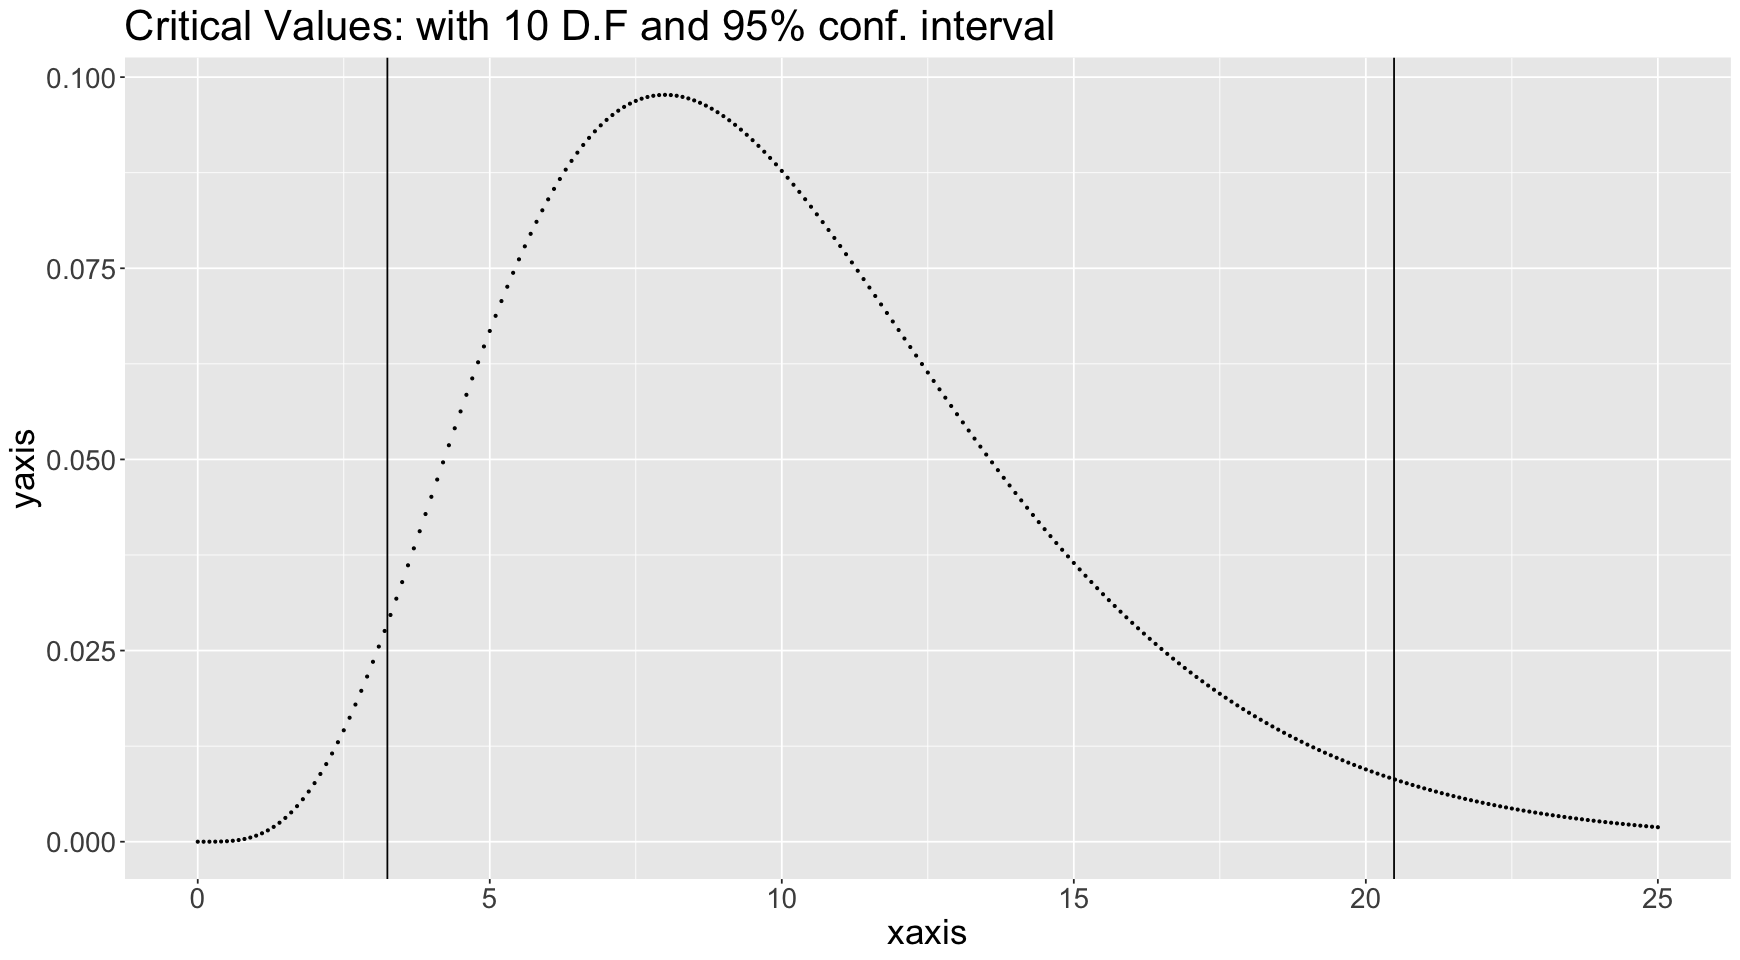

In [45]:

yaxis <- dchisq(seq(0,25,by=.1), df=10, ncp = 0, log = FALSE)
xaxis <- seq(0,25,by=.1)
SampleData<- data.table(xaxis = xaxis, yaxis=yaxis)

ggplot(SampleData, aes(xaxis,yaxis))+geom_point(size=0.5)+
#vertical at right line
geom_vline(xintercept=qchisq(.975,df=10))+
# increase font size
theme(text=element_text(size=21))+
# create vertical line left
geom_vline(xintercept=qchisq(.025,df=10))+
# title
ggtitle("Critical Values: with 10 D.F and 95% conf. interval")

# Ex. ) Find the standard deviation, given d.f.=10, confidence 95%

In [52]:
set.seed(1234)
fake_dta<-round(runif(10, min=10, max=18), digits = 2)
print('Fake data points:')
fake_dta

print('Range of standard deviation for Population should fall within this:')
c(
sqrt(((10-1)*sd(fake_dta)^2)/qchisq(c(.025),df=9, lower.tail=FALSE)),
sqrt(((10-1)*sd(fake_dta)^2)/qchisq(c(.975),df=9, lower.tail=FALSE))
)

[1] "Fake data points:"


[1] 10.91 14.98 14.87 14.99 16.89 15.12 10.08 11.86 15.33 14.11

[1] "Range of standard deviation for Population should fall within this:"


[1] 1.512283 4.013808

In [53]:
# Population Standard Deviation: does fall within our range
round(sd(fake_dta),digits=3)

[1] 2.199

# Ex. ) Given a point=16.44 and a D.F=10 what is the probability of occuring?


In [56]:
print('this means that 91.12% of data occur before this 16.44')
round(pchisq(16.44,df=10),digits=3)

[1] "this means that 91.12% of data occur before this 16.44"


[1] 0.912

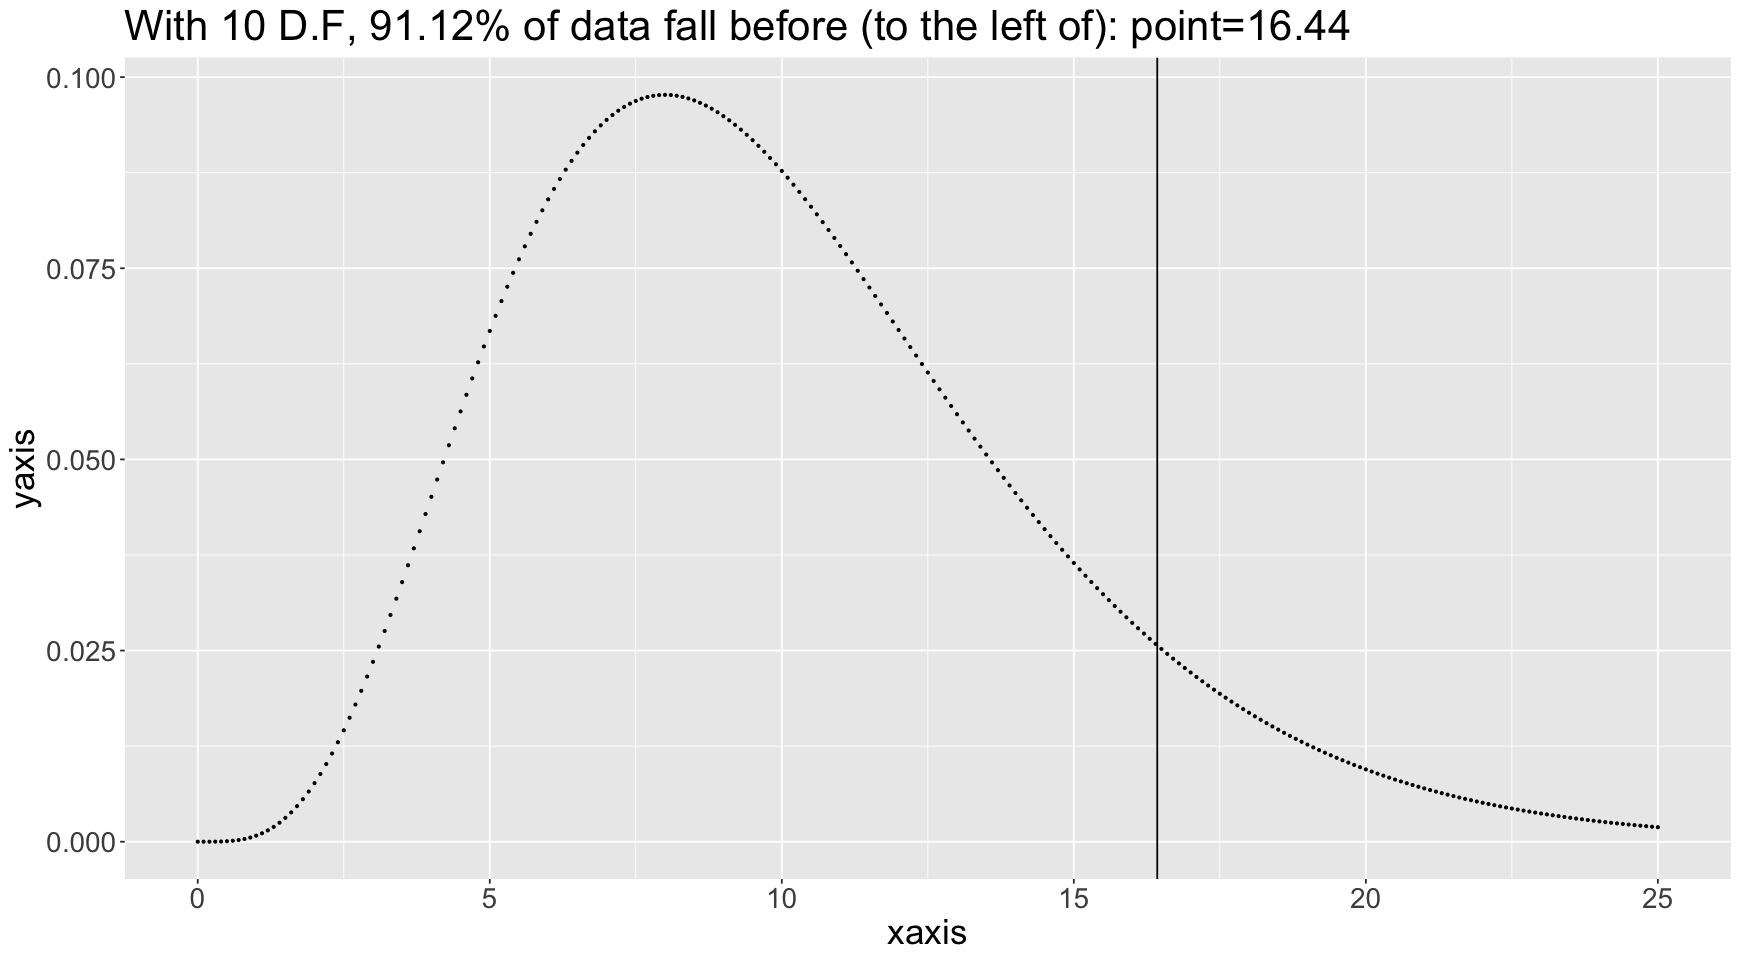

In [64]:
ggplot(SampleData, aes(xaxis,yaxis))+geom_point(size=0.5)+
theme(text=element_text(size=21))+
geom_vline(xintercept=qchisq(.912,df=10))+
# title
ggtitle("With 10 D.F, 91.12% of data fall before (to the left of): point=16.44")

# `Test for Independence:` (*`Pearsons`* *Chi-sqaure test*)


+ Are 2 or more categorical variables associated: independent (*mutually exclusive*) from each other; from a single sample.
    + Need Large sample size
    + Cannot provide inference about causation
    + DO NOT exclude any categories from your data
+ Do not use this test if your data represent 'pre/post-test' observations because this will violate independence and you will need another test such as 'McNemar's test'

**`How to think about it:`** `measuring how well the observed distribution of data fit the expected distribution of data if the varibales are independent`

**`IMPORTANT CONSIDERATION:`** The test can tell you information based on what information is provided; but, you are not able to distinguish if the categories are meaniful.


[Further clarification](https://www.ling.upenn.edu/~clight/chisquared.htm)

`Degrees of Freedom:` (number of rows - 1) * (number of columns - 1)

 `Notes:`

+ `We cannot use this test if we have: continuous or parametric data`

+ Do not put percentages or frequency counts into your grid!

`What it will tell you:`

+ The probability of independence


`What it WON'T Tell You!`

+ Doesn't tell you the relationship between data



# Ex. )  Let's look at a made up example wondering if:

|              	|     	|        	| **Injury Level** 	|          	|      	|
|--------------	|-----	|--------	|--------------	|----------	|------	|
|              	|     	| `None`   	| `Minimal`      	| `Moderate` 	| `High` 	|
| **SeatBelt Use** 	| `YES` 	| 44,321 	| 1,211        	| 689      	| 212  	|
|              	| `NO`  	| 89,000 	| 3,959        	| 5,896    	| 684  	|


#  `We are trying to find out if:` seatbelt usage impacts crash injury level!

Let's think about something:

* `We are trying to find out if the rows are independent`
* `You need to establish your Null Hypothesis $H_o$ where we can say that rows are independent`
    * Under the circumstance we are able to calculate based on the assumption of independence, use the marginal probabilities to calculate the expected counts. 
    
    
[motivation for this problem](https://www.math.csi.cuny.edu/Statistics/R/simpleR/stat013.html)

In [72]:
yes_seatbelt<-c(44321,1211,689,212)
no_seatbelt<-c(99000,3959,5989,684)

chisq.test(rbind(yes_seatbelt,no_seatbelt))

# instead of rbind, can do data.frame() also


	Pearson's Chi-squared test

data:  rbind(yes_seatbelt, no_seatbelt)
X-squared = 1416, df = 3, p-value < 2.2e-16


# <font color=red>Answer: </font>

`Given such a low probability value, we would reject the $H_o$ and say that these rows are NOT independent`

`----------------`

# Ex. ) Let's Work out an example to see how the table is actually calculated:

 + Your professor will love to bore you with this and make you do this: TRUST ME.

# Assume we have some voting by two parties on United Nation Resolutions:

# 1.) `Hypothesis:`

`Null Hypothesis:` The outcome is independent of groups
`Alternate Hypothesis:` Null Hypothesis is False

# 2.) `[Expected] data we start with:`


# `Expected VALUES TABLE`

|               	| **For** 	| **Against**	| **Abstain** 	| `Row_Totals` 	|
|---------------	|-----	|---------	|---------	|------------	|
| **Pastafarian**   	| 112 	| 90      	| 45      	| 247        	|
| **Ganjatarian**   	| 223 	| 105     	| 71      	| 399        	|
| `Column_Totals` 	| 335 	| 195     	| 116     	| **646**        	|

# 3.) `Generate the Observed Data`

# `Observed VALUES TABLE`

+ First to calculate the `Expected value:` <font size=5>$\frac{(colTot*rowTot)}{grandTot Sample}$</font>

Let's get into business:

|               	| For                 	| Against             	| Abstain            	| `Row_Totals` 	|
|---------------	|---------------------	|---------------------	|--------------------	|------------	|
| **Pastafarian**   	| 247*335/646=128.088 	| 247*195/646=74.559  	| 247*116/646=44.353 	| 247        	|
| **Ganjatarian**   	| 399*335/646=206.912	| 399*195/646=120.441 	| 399*116/646=71.647	| 399        	|
| `Column_Totals` 	| 335                 	| 195                 	| 116                	| **646**        	|

In [575]:
round(c(247*335/646,
247*195/646,
247*116/646,
399*335/646,
399*195/646,
399*116/646),digits=2)

[1] 128.09  74.56  44.35 206.91 120.44  71.65

# 4.) Now create the Chi-sq stat 

# `Now Calculate:` 
<font size=5>$\chi^2 = \sum_{k} \frac{(Observed -Expected)^2}{Expected}$</font>

(128.088-112)^2/112+(74.559-90)^2/90+(44.353-45)^2/45+(206.912-223)^2/223+(120.441-105)^2/105+(71.647-71)^2/71 = 8.406

# 5.) `Get D.F.`

`Degrees of Freedom:` (col-1)*(row-1) = (3-1)*(2-1) = 2

In [568]:
# Chi-sq value
chi_sq<-(128.088-112)^2/112+(74.559-90)^2/90+(44.353-45)^2/45+(206.912-223)^2/223+
(120.441-105)^2/105+(71.647-71)^2/71
print('Chi-sq value:')
round(chi_sq,digits=3)

print('Prob Observed (8.407)')
round(pchisq(df = 2,8.407,lower.tail = FALSE),digits=5)

[1] "Chi-sq value:"


[1] 8.407

[1] "Prob Observed (8.407)"


[1] 0.01494

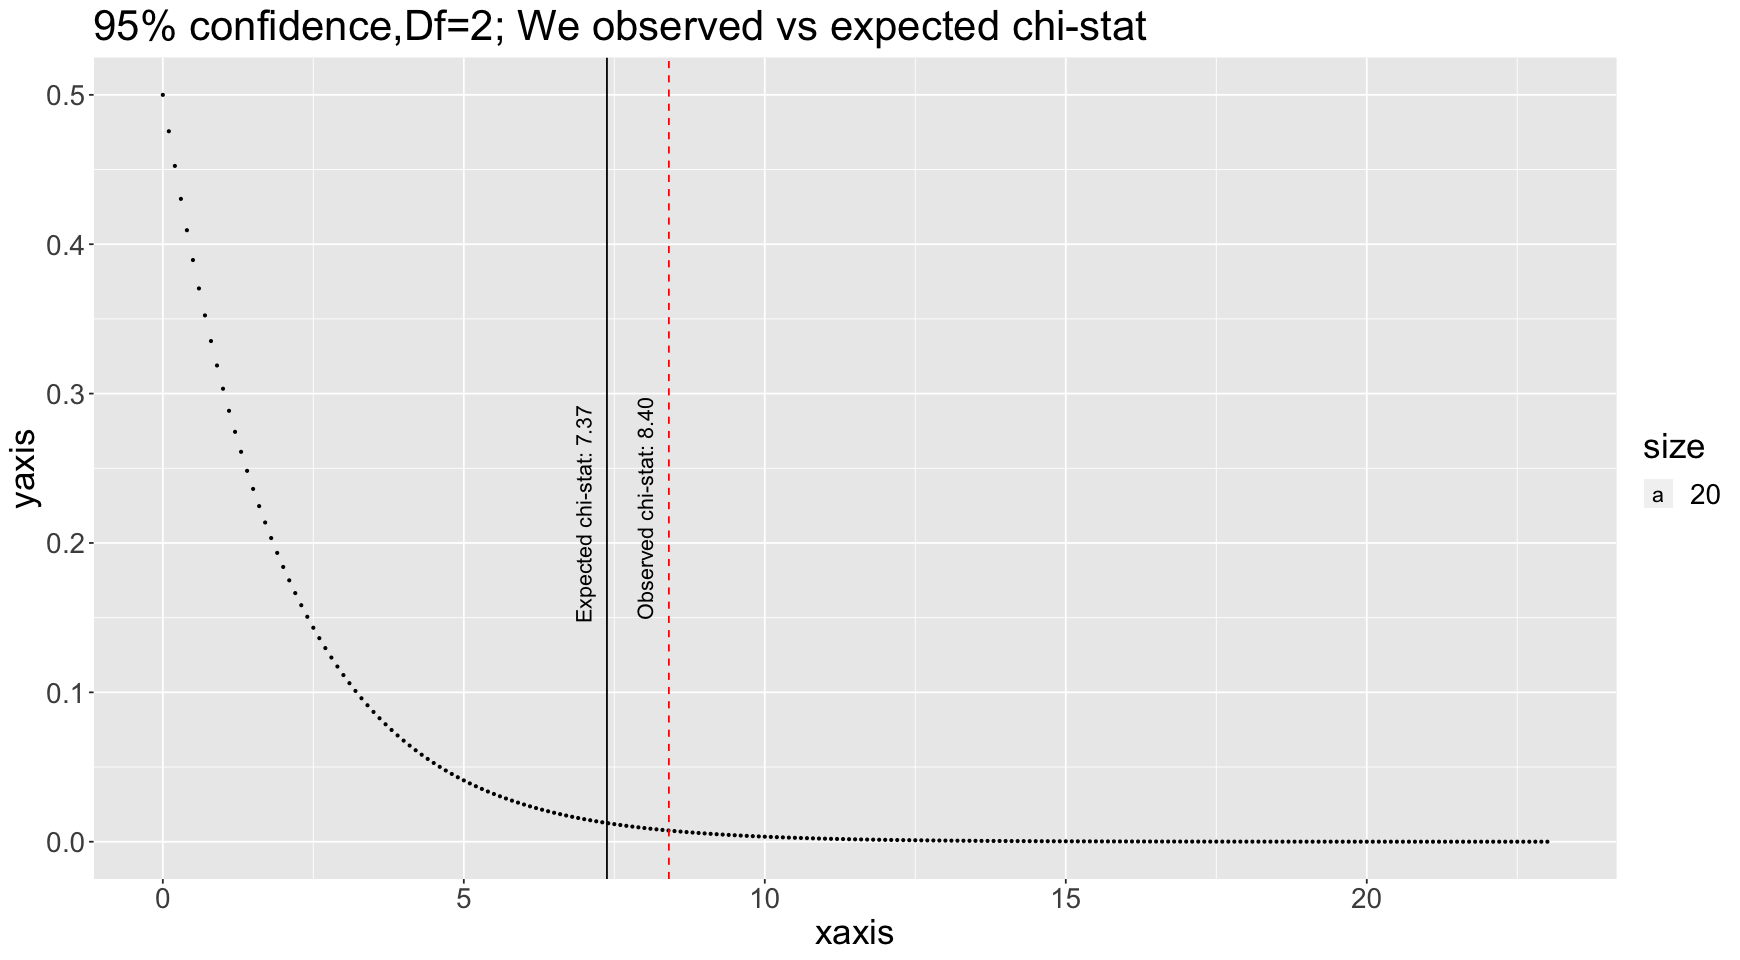

In [306]:
y_axis <- dchisq(seq(0,23,by=.1), df=2, ncp = 0, log = FALSE)
x_axis <- seq(0,23,by=.1)
Samp<- data.table(xaxis = x_axis, yaxis=y_axis)

cuts<- data.frame(Ref = c("Expected chi-stat: 7.37", "Observed chi-stat: 8.40"),
                   vals = c(qchisq(.975,df=2),chi_sq),
                   stringsAsFactors = FALSE)

ggplot(Samp, aes(xaxis,yaxis))+geom_point(size=0.5)+
theme(text=element_text(size=21))+
geom_vline(xintercept=qchisq(.975,df=2))+
# title
ggtitle("95% confidence,Df=2; We observed vs expected chi-stat")+
geom_vline(xintercept = chi_sq,linetype = "dashed", colour = "red",show.legend = FALSE)+
# adjust text for vertical lines: 
geom_text(mapping = aes(x = vals,
                          y = 0,
                          label = Ref,
                          hjust = -1,
                          vjust = -1,
                         angle=90,size=20),
                        data = cuts)


In [571]:
print('Exact Prob. for each chi-sq at that point! NOT tail')
print('Expected Prob:')
dchisq(df = 2,x=qchisq(.975,df=2))

print('Observed Prob:')
round(dchisq(df = 2,x=8.401),digits=4)


[1] "Exact Prob. for each chi-sq at that point! NOT tail"
[1] "Expected Prob:"


[1] 0.0125

[1] "Observed Prob:"


[1] 0.0075

In [343]:
print('Expected chi-sq stat:')
round(qchisq(.975,df=2),digits=4)

print('Observed chi-sq stat:')
round(chi_sq,digits=4)



[1] "Expected chi-sq stat:"


[1] 7.3778

[1] "Observed chi-sq stat:"


[1] 8.4066

In [362]:
# Alternate Way of doing same thing and checking I am not crazy:
df = rbind(data.frame(group="pastafarian", resolution="for")[replicate(112, 1),],
           data.frame(group="pastafarian", resolution="against")[replicate(90, 1),],
           data.frame(group="pastafarian", resolution="abstain")[replicate(45, 1),],
           data.frame(group="ganjafarian", resolution="for")[replicate(223, 1),],
           data.frame(group="ganjafarian", resolution="against")[replicate(105, 1),],
           data.frame(group="ganjafarian", resolution="abstain")[replicate(71, 1),])
chisq.test(table(df$group, df$resolution))


	Pearson's Chi-squared test

data:  table(df$group, df$resolution)
X-squared = 8.4645, df = 2, p-value = 0.01452


# `Answer:`

+ Given that we have a probability is so low we would conclude that we should Drop the hypothesis of independence if we were dealing with anything 95% or less for confidence level ($\alpha$)

`How can we simplify this answer?`

+ With a p-value of 0.01452, we would expect 1.45% likelihood of the Null hypothesis being correct. 

If these data were due entirely to chance, then you would encounter a 1.45% chance of your data being this extreme with the oberserved vs expected.

`APPEARS THEY ARE DEPENDENT, BTW...`

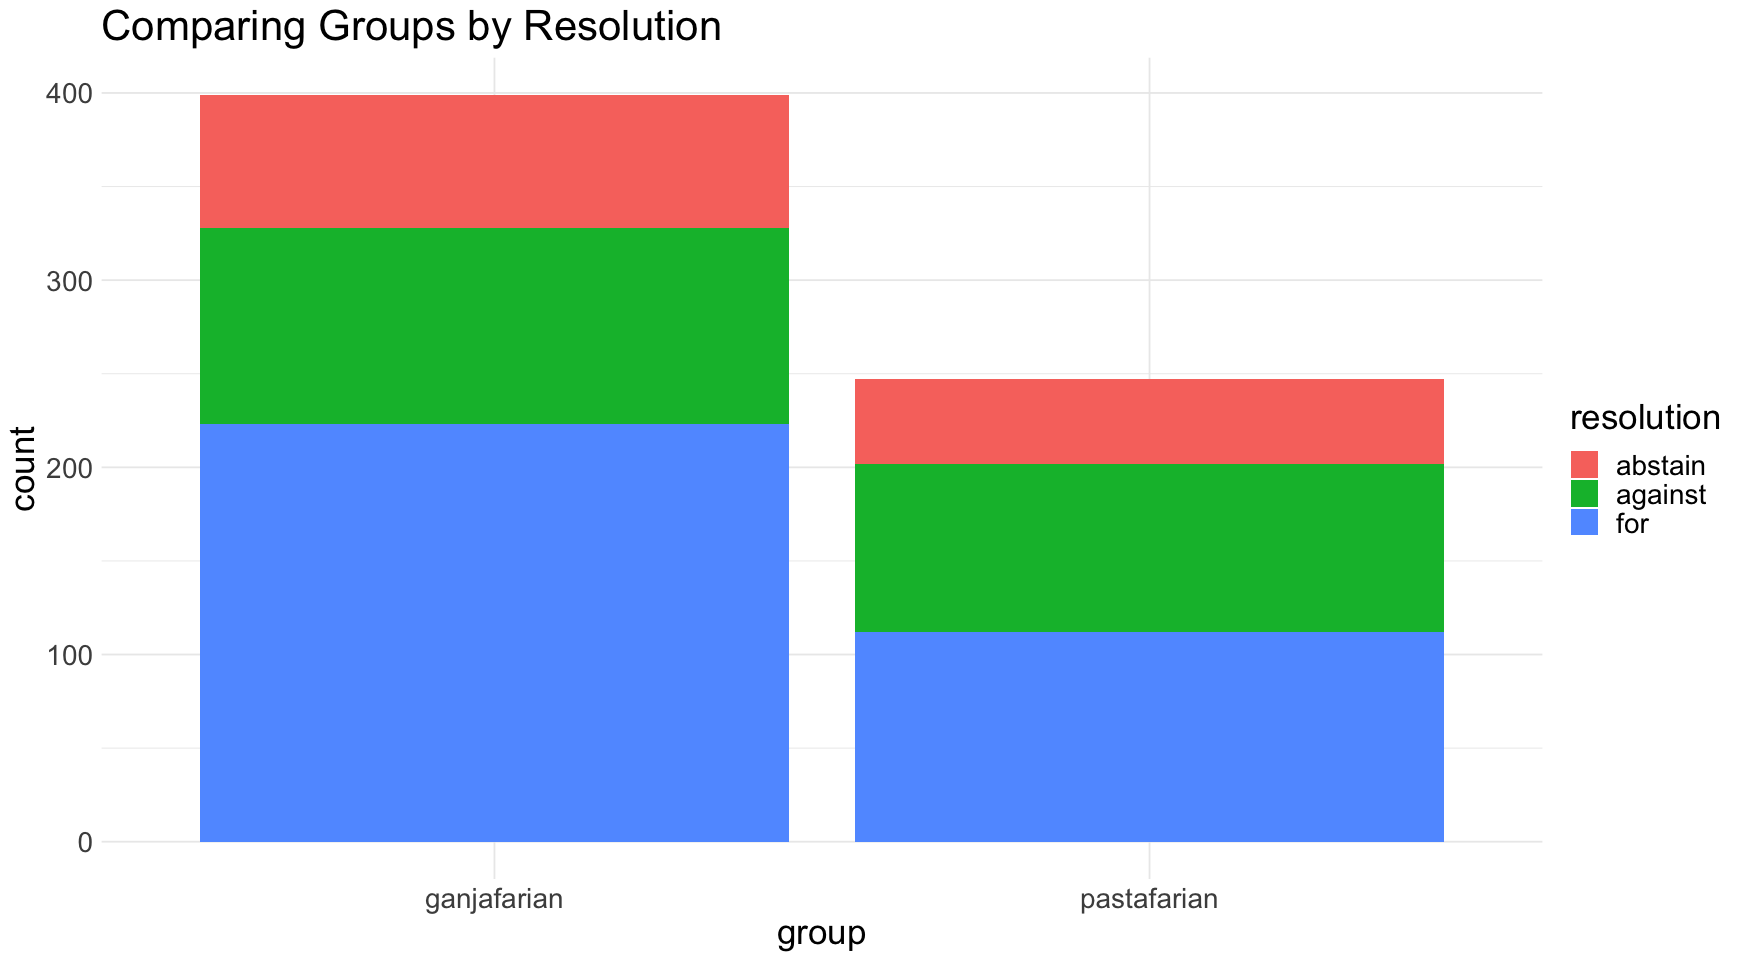

In [363]:
ggplot(df) +
  aes(x = group, fill = resolution) +
  geom_bar() +
  scale_fill_hue() +
  theme_minimal()+theme(text=element_text(size=21))+
ggtitle("Comparing Groups by Resolution")

# <font color=red>LIKE</font>, Share &

# <font color=red>SUB</font>scribe

# `Citations & Help:`

`Chi Square`

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3666.htm

https://www.tutorialspoint.com/statistics/chi_squared_distribution.htm

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

https://stattrek.com/probability-distributions/chi-square.aspx

https://mathworld.wolfram.com/Chi-SquaredDistribution.html

https://rpubs.com/mpfoley73/460935 (plot)

https://courses.lumenlearning.com/introstats1/chapter/goodness-of-fit-test/

https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols

https://libguides.library.kent.edu/spss/chisquare#:~:text=The%20Chi%2DSquare%20Test%20of%20Independence%20determines%20whether%20there%20is,Chi%2DSquare%20Test%20of%20Association.

https://online.stat.psu.edu/stat504/node/60/

https://www.math.csi.cuny.edu/Statistics/R/simpleR/stat013.html (code)

https://www.statlect.com/probability-distributions/chi-square-distribution

https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=2131&context=gradreports

https://online.stat.psu.edu/stat200/book/export/html/230#:~:text=Chi%2Dsquare%20tests%20are%20always%20right%2Dtailed%20tests.&text=If%20p%E2%89%A4%CE%B1%20p,to%20reject%20the%20null%20hypothesis.

`Confidence Intervals`

http://www3.govst.edu/kriordan/files/mvcc/math139/pdf/lfstat3e_ppt_06.pdf

https://www.colorado.edu/amath/sites/default/files/attached-files/ch7_0.pdf

http://ianmadd.github.io/pages/Confidence_Intervals_Part4.html

http://math.haifa.ac.il/asegal/qm/ln/ConfIntPROP_QM_v1.pdf

https://courses.wccnet.edu/~palay/math160r/prob_chisq.htm

`plot help`

https://community.rstudio.com/t/how-to-add-name-to-the-geom-vline-not-as-a-legend-though/38606/2

https://community.rstudio.com/t/how-to-label-some-vertical-lines-in-ggplot/59560/2

https://mse.redwoods.edu/darnold/math15/spring2013/R/Activities/ChiSquareTestOfHomogeneity.html

`----------`

https://learningstatisticswithr.com/book/chisquare.html

https://web.stanford.edu/class/psych252/cheatsheets/chisquare.html

https://vulstats.ucsd.edu/notes/nhst-chi-squared.html

https://www.statsandr.com/blog/chi-square-test-of-independence-in-r/

https://sites.williams.edu/bklingen/files/2012/02/R-code-for-inference-about-several-proportions.pdf (goodness of fit, independence,homogeneity)

https://tjmurphy.github.io/jabstb/chisquare.html